In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving laptops.csv to laptops.csv


In [ ]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "laptops.csv" with length 298573 bytes


In [ ]:
df=pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
df1=df.drop(['GPU'],axis=1)
df1.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,15.6,No,669.01


In [ ]:
df1.isnull().sum()

Laptop           0
Status           0
Brand            0
Model            0
CPU              0
RAM              0
Storage          0
Storage type    42
Screen           4
Touch            0
Final Price      0
dtype: int64

In [ ]:
mean_value=df1['Screen'].mean()
df1['Screen'].fillna(value=mean_value, inplace=True)

In [ ]:
df1['Storage type'].fillna(value='SSD', inplace=True)

In [ ]:
df1.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
Screen          0
Touch           0
Final Price     0
dtype: int64

<Axes: >

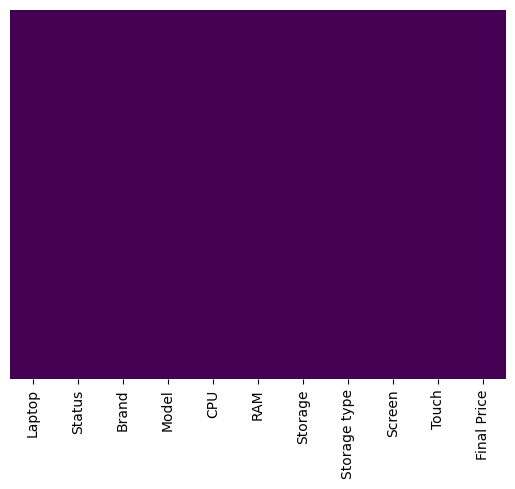

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df1[df1.duplicated()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price


**No duplicate values are present**

<Axes: xlabel='Final Price', ylabel='Count'>

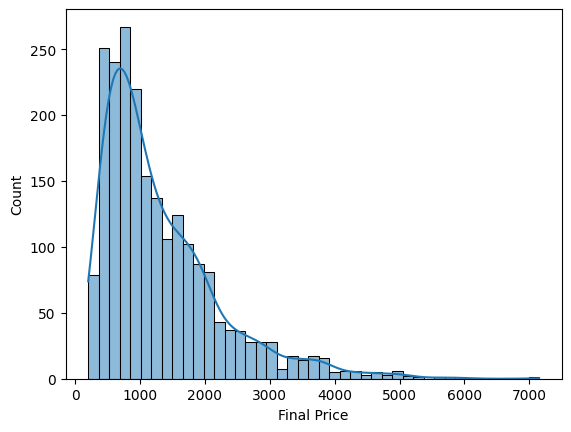

In [ ]:
sns.histplot(data=df1, x="Final Price",kde=True)

In [ ]:
df1.rename(columns={'Final Price':'Final_Price'}, inplace = True)

In [ ]:
upper_limit=df1.Final_Price.mean()+3*df1.Final_Price.std()
lower_limit=df1.Final_Price.mean()-3*df1.Final_Price.std()

In [ ]:
upper_limit

4047.0647603578136

In [ ]:
lower_limit

-1421.7877418392954

In [ ]:
df2 = df1[(df1.Final_Price<upper_limit) & (df1.Final_Price>lower_limit)]


In [ ]:
df2.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final_Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,15.6,No,669.01


In [ ]:
df2.shape

(2124, 11)

In [ ]:
df1.shape

(2160, 11)

In [ ]:
df.shape

(2160, 12)

<Axes: xlabel='Final_Price', ylabel='Count'>

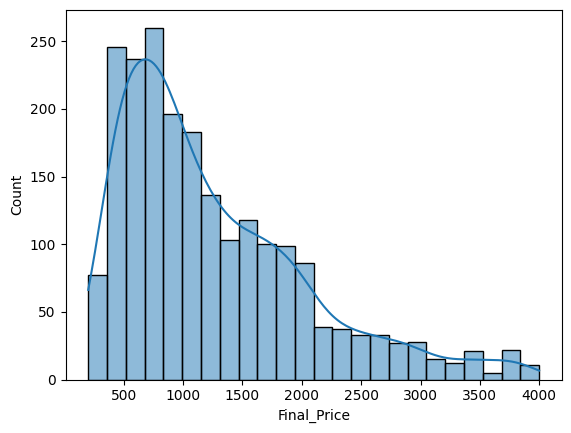

In [ ]:
sns.histplot(data=df2, x="Final_Price",kde=True)

In [ ]:
df2.describe()

,RAM,Storage,Screen,Final_Price
count,2124.000000,2124.000000,2124.000000,2124.000000
mean,14.944444,582.148776,15.146997,1253.889600
std,8.825023,340.853116,1.195655,794.495434
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,652.737500
50%,16.000000,512.000000,15.600000,1015.280000
75%,16.000000,1000.000000,15.600000,1699.000000
max,64.000000,4000.000000,18.000000,3999.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2124 non-null   object 
 1   Status        2124 non-null   object 
 2   Brand         2124 non-null   object 
 3   Model         2124 non-null   object 
 4   CPU           2124 non-null   object 
 5   RAM           2124 non-null   int64  
 6   Storage       2124 non-null   int64  
 7   Storage type  2124 non-null   object 
 8   Screen        2124 non-null   float64
 9   Touch         2124 non-null   object 
 10  Final_Price   2124 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 199.1+ KB


In [ ]:
df2.Final_Price = df2.Final_Price.astype(int)

<ipython-input-38-29d342395572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Final_Price = df2.Final_Price.astype(int)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2124 non-null   object 
 1   Status        2124 non-null   object 
 2   Brand         2124 non-null   object 
 3   Model         2124 non-null   object 
 4   CPU           2124 non-null   object 
 5   RAM           2124 non-null   int64  
 6   Storage       2124 non-null   int64  
 7   Storage type  2124 non-null   object 
 8   Screen        2124 non-null   float64
 9   Touch         2124 non-null   object 
 10  Final_Price   2124 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 199.1+ KB


In [ ]:
df2.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final_Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,15.6,No,1009
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,15.6,No,299
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,15.6,No,789
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No,1199
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,15.6,No,669


In [ ]:
df2[50:60]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final_Price
50,Apple MacBook Air Apple M1/8GB/256GB SSD/GPU H...,New,Apple,MacBook Air,Apple M1,8,256,SSD,13.3,No,1219
51,Lenovo ThinkBook 14 Intel Core i5-1135G7/8GB/2...,New,Lenovo,ThinkBook,Intel Core i5,8,256,SSD,14.0,No,699
52,ASUS TUF Gaming A15 2023 FA507NV-LP041 AMD Ryz...,New,Asus,TUF,AMD Ryzen 7,16,1000,SSD,15.6,No,1349
53,MSI Katana 15 B12VGK-094XES Intel Core i7-1265...,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No,1699
54,ASUS M515UA-EJ522W AMD Ryzen 5 5500U/8GB/512GB...,New,Asus,M515UA,AMD Ryzen 5,8,512,SSD,15.6,No,699
55,HP Victus 16-e0101ns AMD Ryzen 7 5800H/16GB/51...,New,HP,Victus,AMD Ryzen 7,16,512,SSD,16.1,No,1299
56,HP 250 G9 Intel Celeron N4500/8 GB/256GB SSD/1...,New,HP,250,Intel Celeron,8,256,SSD,15.6,No,399
57,HP OMEN 16-C0042NS AMD Ryzen 7 5800H/16GB/512G...,New,HP,Omen,AMD Ryzen 7,16,512,SSD,16.1,No,1149
58,MSI Modern 15 B7M-041XES AMD Ryzen 5 7530U/16G...,New,MSI,Modern,AMD Ryzen 5,16,512,SSD,15.6,No,839
59,"HP 255 G9 AMD Athlon 3020e/8GB/512GB SSD/15.6""",New,HP,255,AMD Athlon,8,512,SSD,15.6,No,379


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2['Laptop']= le.fit_transform(df2['Laptop'])
df2['Status']= le.fit_transform(df2['Status'])
df2['Brand']= le.fit_transform(df2['Brand'])
df2['Model']= le.fit_transform(df2['Model'])
df2['CPU']= le.fit_transform(df2['CPU'])
df2['Storage type']= le.fit_transform(df2['Storage type'])
df2['Touch']= le.fit_transform(df2['Touch'])

<ipython-input-44-73cace87502d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Laptop']= le.fit_transform(df2['Laptop'])
<ipython-input-44-73cace87502d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Status']= le.fit_transform(df2['Status'])
<ipython-input-44-73cace87502d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df2.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final_Price
0,39,0,3,42,16,8,512,0,15.6,0,1009
1,479,0,1,54,13,8,256,0,15.6,0,299
2,33,0,3,42,15,8,256,0,15.6,0,789
3,1718,0,14,58,17,16,1000,0,15.6,0,1199
4,934,0,9,4,16,16,512,0,15.6,0,669


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3= scaler.fit_transform(df2)

In [ ]:
df3= pd.DataFrame(df3, columns =['Laptop','Status','Brand','Model','CPU','RAM','Storage','Storage type','Screen','Touch','Final_price'])

In [ ]:
df3.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch,Final_price
0,-1.667629,-0.665533,-1.036419,-0.757493,0.346582,-0.787089,-0.205852,-0.164558,0.378963,-0.343358,-0.307965
1,-0.950019,-0.665533,-1.386173,-0.411781,-0.343765,-0.787089,-0.957086,-0.164558,0.378963,-0.343358,-1.201778
2,-1.677415,-0.665533,-1.036419,-0.757493,0.116466,-0.787089,-0.957086,-0.164558,0.378963,-0.343358,-0.584922
3,1.070708,-0.665533,0.887230,-0.296543,0.576697,0.119638,1.226187,-0.164558,0.378963,-0.343358,-0.068776
4,-0.207944,-0.665533,0.012844,-1.852247,0.346582,0.119638,-0.205852,-0.164558,0.378963,-0.343358,-0.735989


In [ ]:
x=df3.drop(['Final_price'],axis=1)

In [ ]:
y=df3.Final_price

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Final_price', ylabel='Density'>

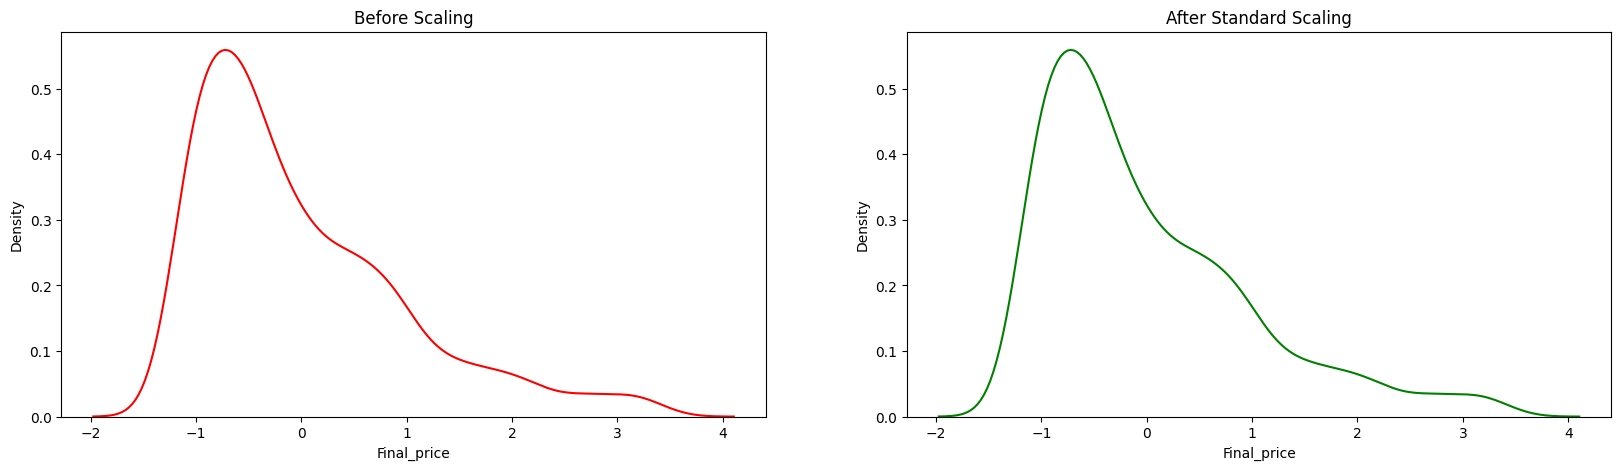

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df3['Final_price'], ax = ax1, color ='r')
ax2.set_title('After Standard Scaling')
sns.kdeplot(df3['Final_price'], ax = ax2, color ='g')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_test,y_test)

0.6277369991356773

In [ ]:
reg.score(x_train,y_train)

0.5828384398991293

In [ ]:
from sklearn.linear_model import Ridge
reg2=Ridge(alpha=1)
reg2.fit(x_train,y_train)

Ridge(alpha=1)

In [ ]:
reg2.score(x_test,y_test)

0.6277344012236881

In [ ]:
reg2.score(x_train,y_train)

0.5828382313905625